In [26]:
import pandas as pd

df = pd.read_csv("ExcelFormattedGISTEMPDataCSV.csv")
print(df.shape)
df.head(3)

(136, 19)


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-29,-19,-17,-27,-13,-28,-22,-6,-16,-15,-18,-20,-19,***,****,-19,-19,-16
1,1881,-8,-13,2,-2,-3,-27,-5,-1,-8,-18,-25,-14,-10,-11,-13,-1,-11,-17
2,1882,10,10,2,-19,-17,-24,-9,5,0,-21,-20,-24,-9,-8,2,-11,-9,-14


In [27]:
# J-D,
# D-N,
# DJF : winter
# MAM : spring
# JJA : summer
# SON : autumn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
Year    136 non-null int64
Jan     136 non-null int64
Feb     136 non-null int64
Mar     136 non-null int64
Apr     136 non-null int64
May     136 non-null int64
Jun     136 non-null int64
Jul     136 non-null object
Aug     136 non-null object
Sep     136 non-null object
Oct     136 non-null object
Nov     136 non-null object
Dec     136 non-null object
J-D     136 non-null object
D-N     136 non-null object
DJF     136 non-null object
MAM     136 non-null int64
JJA     136 non-null object
SON     136 non-null object
dtypes: int64(8), object(11)
memory usage: 20.3+ KB


In [28]:
df['Winter'] = pd.to_numeric(df['DJF'], errors='coerce')
df['Spring'] = pd.to_numeric(df['MAM'], errors='coerce')
df['Summer'] = pd.to_numeric(df['JJA'], errors='coerce')
df['Autumn'] = pd.to_numeric(df['SON'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 23 columns):
Year      136 non-null int64
Jan       136 non-null int64
Feb       136 non-null int64
Mar       136 non-null int64
Apr       136 non-null int64
May       136 non-null int64
Jun       136 non-null int64
Jul       136 non-null object
Aug       136 non-null object
Sep       136 non-null object
Oct       136 non-null object
Nov       136 non-null object
Dec       136 non-null object
J-D       136 non-null object
D-N       136 non-null object
DJF       136 non-null object
MAM       136 non-null int64
JJA       136 non-null object
SON       136 non-null object
Winter    135 non-null float64
Spring    136 non-null int64
Summer    135 non-null float64
Autumn    135 non-null float64
dtypes: float64(3), int64(9), object(11)
memory usage: 24.5+ KB


In [56]:
gdf = df[['Year', 'Winter', 'Spring', 'Summer', 'Autumn']].groupby('Year').mean()
gdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 1880 to 2015
Data columns (total 4 columns):
Winter    135 non-null float64
Spring    136 non-null int64
Summer    135 non-null float64
Autumn    135 non-null float64
dtypes: float64(3), int64(1)
memory usage: 5.3 KB


In [57]:
gdf.head(3)

,Winter,Spring,Summer,Autumn
Year,,,,
1880,NaN,-19,-19.0,-16.0
1881,-13.0,-1,-11.0,-17.0
1882,2.0,-11,-9.0,-14.0


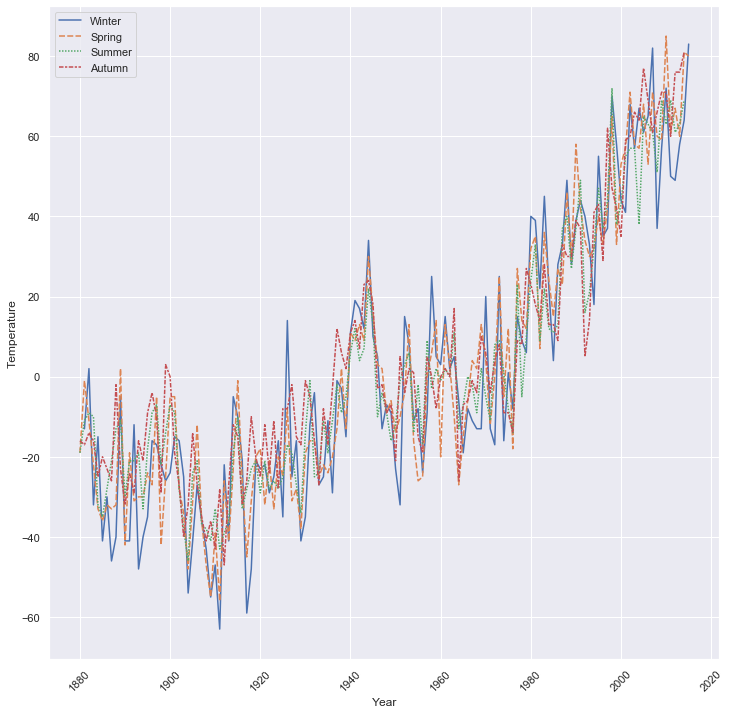

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12, 12)})
fig = sns.lineplot(data=gdf)
plt.setp(fig.get_xticklabels(), rotation=45)
plt.ylabel('Temperature')
plt.show(fig)